<a href="https://colab.research.google.com/github/aleeshajaganath/image_processing_using_-python/blob/master/Image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'load all the packages'


import numpy as np
from matplotlib import pyplot as plt



from sklearn.model_selection import KFold

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model

'defining the model'
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(5, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [0]:
def evaluate_model(model, dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [0]:
from google.colab import files
import pandas as pd

In [0]:
uploaded= files.upload()

Saving test.csv to test.csv


In [0]:
#_______________________________________load dataset___________________________________________

#  trainX contains values of images for training excluding the label
#  testX  contains values of images for test data excluding the label
trainX = np.loadtxt('train.csv', delimiter=",")
testX = np.loadtxt('test.csv', delimiter=",")


#train_y contains the class  label corresponding to the trainX 
#test_y contains the class  label corresponding to the testX 


trainY = np.loadtxt('train_y.csv')
testY = np.loadtxt('test_y.csv')

#dataset = pd.read_csv('train.csv', delimiter=",")

#reshaping
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainX=trainX.astype('float32')
testX=testX.astype('float32')




trainY = to_categorical(trainY)
	
testY = to_categorical(testY)

model = define_model()

scores, histories = evaluate_model(model, trainX, trainY)
# fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model
model.save('final_model.h5')

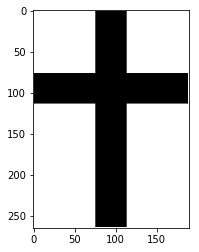

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('download.png')
imgplot = plt.imshow(img)
plt.show()



**Testing using a downloaded ' cross ' image** 


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 16 08:42:24 2019

@author: user
"""

# -*- coding: utf-8 -*-
"""
Created on Thu Aug 15 10:31:27 2019

@author: user
"""

# -*- coding: utf-8 -*-
"""
Created on Tue Aug 13 11:58:36 2019

@author: user
"""

# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


# load and prepare the image
def load_image(filename):
	# load the image
 
    #file1 = open("category 4.txt","w") 
	img = load_img(filename, grayscale=True, target_size=(28, 28))
    #print(img)
	# convert to array
	img = img_to_array(img)
    
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
    
    
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('download.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	label = model.predict_classes(img)
	print("category ",label[0])

# entry point, run the example
run_example()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


category  4
